# Introduction

**The goal of this project is to discover the best neighboorhood in Pittsburgh. For our approach, we determined the best neighborhood relies on our own personal satisfaction, and what we would personally find satisfying in our ideal neighborhood. Collectively, we determined that in the future, we don't want to live to be very old, for there are various negative effects associated with aging. 87% of older individuals want to stay in their own home for the rest of their life. Being able to age in a single place, is one of the fastest-growing trends for the senior living industry. Along these lines, there are multiple negative effects to consider: high medical cost to maintain healthiness, a growing feeling of loneliness, and days start to feel like routine. Exercise becomes painful, dating becomes difficult, we start to feel less attractive, and much more, causes life to become stagnant, creating boredom and an overall dissatisfying life. Therefore, we want to mitigate that, and find a neighborhood where we have the lowest possible chance of surviving into old age.**

# The Metric

**Our metric, as determined by what will lead us to the most satisfying life, is the neighborhood that prevents us from surviving into old age. In addition, due to the growing population of the world today, our death will also satisfy population control. Thus, the best neighborhood is one that doesn't kill us too soon, but doesn't kill us too much later in our life either. We want to be able to enjoy life without the negatives of old age. The datasets we chose are measuring COVID deaths, landslides, and median age of death, in each neighborhood of Pittsburgh.**

# Covid Cases

My group decided that in old age, since your immune system becomes less effective, you become more succeptible to illness and their harmful effects. Thus, if we don't want to live very long, a neighborhood with a high chance of us getting sick will help to end it. My dataset follows Allegheny County COVID-19 Tests, Cases, and Deaths, and is up to date as of March 28th 2022. Since my dataset has 12 different columns, I'll start by simplifying the information down to the columns that I wish to use. Therefore, I will group the neighborhoods with their listed infections, deaths, and hospitalizations counts. The more infections leads to a higher chance I will get sick, the more deaths means a higher chance I will die as intended, and the higher hospitalizations means the more severe the case.

In [94]:
import pandas as pd
import numpy as np
%matplotlib inline

cov = pd.read_csv("CovidCases.csv",usecols = ['neighborhood_municipality','infections','deaths','hospitalizations'])

cov.groupby('neighborhood_municipality').count().head(10)

,infections,deaths,hospitalizations
neighborhood_municipality,,,
Aleppo,1,1,1
Allegheny Center (Pittsburgh),1,1,1
Allegheny West (Pittsburgh),1,1,1
Allentown (Pittsburgh),1,1,1
Arlington (Pittsburgh),1,1,1
Arlington Heights (Pittsburgh),1,1,1
Aspinwall,1,1,1
Avalon,1,1,1
Baldwin Borough,1,1,1


This table isn't very organized to our needs, for it only shows the neighborhoods in order, so the neighborhoods with the lowest counts are appearing here. Next, I will gather the 20 neighborhoods with the highest death count, since us dying is ultimately the main goal. 

In [95]:
highDeaths = cov.nlargest(20,['deaths'])

highDeaths.head(10)

,neighborhood_municipality,infections,deaths,hospitalizations
162,Ross,6471,137,349
122,Monroeville,6181,131,455
116,McCandless,5280,130,221
144,Penn Hills,8051,107,586
119,McKeesport,4260,106,438
18,Bethel Park,7059,95,269
125,Mount Lebanon,6321,89,195
164,Scott,3761,83,146
8,Baldwin Borough,5011,73,294
151,Plum,5356,70,268


Let's plot this as a bar graph to see exactly what the data is telling us:

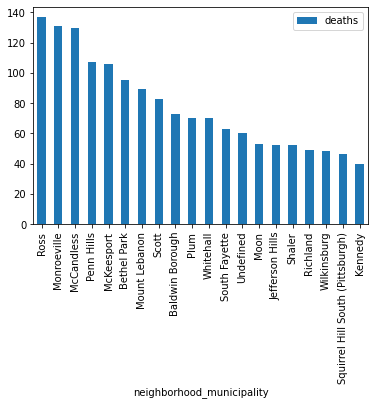

In [19]:
highDeaths.plot(x = 'neighborhood_municipality',y = 'deaths', kind = 'bar')

**Risk Of Death**

There! As the graph shows, Ross is the best neighborhood in regards to chance of dying. However, that isn't the only factor we want to take into account here. Overall, we want to know which neighborhood has the highest risk of illness and death combined. A high amount of deaths isn't too important if our chance of getting sick is low itself, and if the high death count is only due to a large population. Thus, lets create a new column called "risk_of_death". This column will include the total of infections, deaths, and hospitalizations out of the neighborhoods with the highest death count. Then, I'll sort the values in descending order, getting the 10 neighborhoods with the highest risk_of_death at the top.

In [96]:
totalRisk = highDeaths['infections'] + highDeaths['hospitalizations'] + highDeaths['deaths']

highDeaths['risk_of_death'] = totalRisk

highDeaths = highDeaths.sort_values('risk_of_death',ascending = False).head(10)

highDeaths

,neighborhood_municipality,infections,deaths,hospitalizations,risk_of_death
144,Penn Hills,8051,107,586,8744
18,Bethel Park,7059,95,269,7423
162,Ross,6471,137,349,6957
122,Monroeville,6181,131,455,6767
125,Mount Lebanon,6321,89,195,6605
123,Moon,5667,53,184,5904
169,Shaler,5493,52,258,5803
151,Plum,5356,70,268,5694
116,McCandless,5280,130,221,5631
8,Baldwin Borough,5011,73,294,5378


Let's plot the 10 neighborhoods as a bar chart to effectively see the distribution:

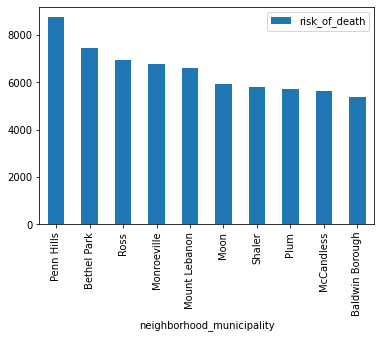

In [63]:
risk_counter = pd.DataFrame(highDeaths, columns = ['neighborhood_municipality','risk_of_death'])
risk_counter.plot(x = 'neighborhood_municipality',y= 'risk_of_death',kind = 'bar')

Let's plot as a scatter plot as well:

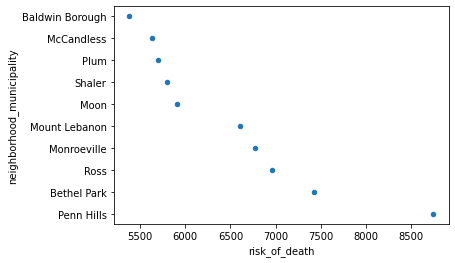

In [22]:
risk_counter.plot(x = 'risk_of_death',y= 'neighborhood_municipality',kind = 'scatter')

**Conclusion of Dataset**

As the data shows, **Penn Hills has the highests risk_of_death count (8744)** out of the 20 neighborhoods with the highest death, ultimately making it the highest chance of us getting sick and dying in our old age. Even with just taking deaths into account, Penn Hills is the 4th highest for amount of deaths due to illness.

# Median Age of Death

<b> One way we decided to measure better is using the median age at death by neighborhood, because we want to die sooner in our life rather than later. Therefore, the lower the median age of death, the better the neighborhood overall.

First, lets open the data and and display it in a nice table. 

In [86]:
import pandas as pd
import importlib
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


ds = pd.read_csv("Median Age At Death.csv", usecols = ['NEIGHBORHOOD','TOTAL MD AGE AT DEATH'])
ds.head(20)

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
1,CHATEAU,NaN
2,NORTH SHORE,80.0
3,ALLEGHENY WEST,65.0
4,SAINT CLAIR,67.5
5,WEST END,77.5
6,ESPLEN,71.7
7,ARLINGTON HEIGHTS,63.7
8,STRIP DISTRICT,72.5
9,FAIRYWOOD,53.3


<b>Next, lets find the lowest median age at death.<b>

In [87]:
ds['TOTAL MD AGE AT DEATH']. min()

0.0

<b> Obviosuly we cannot use 0 as the lowest Median age at death, therefore we must find the second lowest median age at death. <b>

In [88]:
ds.nsmallest(10, ['TOTAL MD AGE AT DEATH'])


,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
9,FAIRYWOOD,53.3
7,ARLINGTON HEIGHTS,63.7
3,ALLEGHENY WEST,65.0
49,EAST ALLEGHENY,66.2
42,ALLENTOWN,66.5
38,MANCHESTER,67.4
4,SAINT CLAIR,67.5
22,NORTHVIEW HEIGHTS,68.0
14,CALIFORNIA-KIRKBRIDE,69.3


### There we have it, the best neighboorhood to live in based on this metric is Fairywood, Pittsburgh

Now that we have detrimened this, lets have some fun with the data.
First, let's convert the nice table above into an even nicer bar graph

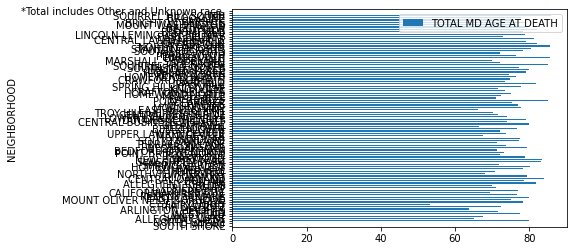

In [89]:
ds.plot.barh(x='NEIGHBORHOOD',
            y='TOTAL MD AGE AT DEATH')

Thats kind of ugly, the problem is we have too many neighborhoods in our list. Lets condense this list so it only displays he lowest 15 median ages at death.

In [90]:
ds.sort_values('TOTAL MD AGE AT DEATH')

ns=ds.head(15)
ns

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
1,CHATEAU,NaN
2,NORTH SHORE,80.0
3,ALLEGHENY WEST,65.0
4,SAINT CLAIR,67.5
5,WEST END,77.5
6,ESPLEN,71.7
7,ARLINGTON HEIGHTS,63.7
8,STRIP DISTRICT,72.5
9,FAIRYWOOD,53.3


Now, let's make a new bar graph that *actually* looks good

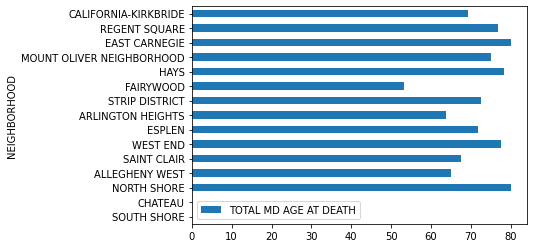

In [91]:
ns.plot.barh(x='NEIGHBORHOOD',
            y='TOTAL MD AGE AT DEATH')

Much better. I'm running out of ways to do to manipulate this data, so lets find the average of this new dataset because why not. First we need to drop the top two neighborhoods in the dataset because they are 0 and NaN respectivly, which will inevitably mess up the calculation

In [92]:
ps=ns.drop([0,1])
ps

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
2,NORTH SHORE,80.0
3,ALLEGHENY WEST,65.0
4,SAINT CLAIR,67.5
5,WEST END,77.5
6,ESPLEN,71.7
7,ARLINGTON HEIGHTS,63.7
8,STRIP DISTRICT,72.5
9,FAIRYWOOD,53.3
10,HAYS,78.3
11,MOUNT OLIVER NEIGHBORHOOD,75.0


In [93]:
ps[['TOTAL MD AGE AT DEATH']].mean(axis=0)

TOTAL MD AGE AT DEATH    71.576923
dtype: float64

**Conclusion of Dataset**

Once again, there we have it. **The best neighboorhood is still Fairywood, Pittsburgh, with a median age of 53.3** and **the average of the lowest 15** *(technically 13)* **neighboorhoods is 71.58 years old**

# Landslides

### Approach and Metric

Our group's approach was to find the best neighborhood depending on which would end our suffering of old age the quickest. We used various types of naturally-caused deaths, such as COVID-19 deaths and median age of death, as our metric to measure the overall safety of each neighborhood purely based on natural events. My submetric was landslide deaths, which proves relevant due to Pittsburgh's hilly geography. My dataset comes from a recent version of NASA's Cooperative Open Online Landslide Repository, updated in February 2021.

### Coding Approach

For my dataset in particular, I found that I was given no outright way in the dataset itself to identify which neighborhood landslides were occuring in, though I was given longitude and latitude coordinates. With these coordinates supplied to me, I decided to use geopy and the Nominatim API to reverse identify the given coordinates.

In [40]:
import pandas as pd
from geopy.geocoders import Nominatim
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
geolocator = Nominatim(user_agent="geoapiExercises")

After being able to get the API imported and ready, I had to import the dataset and find a way to narrow down my searches. Because this was not a western PA specific dataset, it included over 11,000 entries from all over the world. Trying to narrow down by city name proved to be useless, as some neighboring towns were included when using a query mask for "Pittsburgh", and some entries didn't even include a city name. My solution to this was to create a query mask using the latitude and longitude values, finding the very edges of Pittsburgh to create a "bounding box" of sorts around the city.

In [41]:
nbddict = {}
lssize = {}
ls_data = pd.read_csv("globallandslides.csv")
latlon_mask = ls_data.loc[(ls_data['latitude']>=40.361107) & (ls_data['latitude']<=40.492077) & (ls_data['longitude']>=-80.096468) & (ls_data['longitude']<=-79.865034)]

Of course, Pittsburgh itself isn't exactly in the shape of a square, but by creating this bounding box, the number of entries was lowered by a significant amount compared to the original 11,000. Here I also create two dictionaries that I will use later to store the data.

In [42]:
len(latlon_mask)

47

From here, we can then reverse geolocate every single remaining entry. The raw location gives us a full address, and transcribing it into a dictionary then lets every part of the address to be keyed, allowing us to then filter by city and print out the results including the neighborhood. All that's left from here is to fill the previously made two dictionaries, and to keep track of the appearances of each neighborhood, and the average size of the landslides in each neighborhood using numbered values.

In [43]:
for index, row in latlon_mask.iterrows():
    fatalities = row['fatalities']
    size = row['ls_size']
    lat = row['latitude']
    long = row['longitude']
    location = geolocator.reverse(str(lat)+","+str(long))
    address = location.raw['address']
    city = address.get('city', '')
    neighbourhood = address.get('neighbourhood', '')
    county = address.get('county', '')
    if(city == "Pittsburgh" and fatalities != 'NaN'):
        if neighbourhood.lower() in nbddict:
            nbddict[neighbourhood.lower()] += 1
        else:
            nbddict[neighbourhood.lower()] = 1
    if(city == "Pittsburgh" and fatalities != 'NaN' and size == 'small'):
        if neighbourhood.lower() in lssize:
            lssize[neighbourhood.lower()] += 1
        else:
            lssize[neighbourhood.lower()] = 1
    if(city == "Pittsburgh" and fatalities != 'NaN' and size == 'medium'):
        if neighbourhood.lower() in lssize:
            lssize[neighbourhood.lower()] += 2
        else:
            lssize[neighbourhood.lower()] = 2
    if(city == "Pittsburgh" and fatalities != 'NaN' and size == 'large'):
        if neighbourhood.lower() in lssize:
            lssize[neighbourhood.lower()] += 3
        else:
            lssize[neighbourhood.lower()] = 3
for key in lssize:
    lssize[key] = lssize[key] / nbddict[key]
print(nbddict)
print(lssize)

{'mount washington': 11, 'squirrel hill south': 3, 'greenfield': 3, 'lincoln-lemington-belmar': 2, 'elliott': 1, 'spring hill-city view': 1, 'spring garden': 1, 'bedford dwellings': 1, 'south side slopes': 2, 'strip district': 1, 'west end': 2, 'lincoln place': 1, 'westwood': 1, 'downtown': 1, 'perry north': 1, 'crafton heights': 1, 'duquesne heights': 2, 'troy hill': 1, 'beechview': 1, 'stanton heights': 1, 'four mile run': 1, 'carrick': 1, 'south oakland': 1}
{'mount washington': 1.4545454545454546, 'squirrel hill south': 1.0, 'greenfield': 1.6666666666666667, 'lincoln-lemington-belmar': 1.5, 'elliott': 2.0, 'spring hill-city view': 2.0, 'spring garden': 1.0, 'bedford dwellings': 2.0, 'south side slopes': 1.5, 'strip district': 2.0, 'west end': 1.5, 'lincoln place': 2.0, 'westwood': 1.0, 'downtown': 1.0, 'perry north': 1.0, 'crafton heights': 2.0, 'duquesne heights': 1.0, 'troy hill': 1.0, 'beechview': 1.0, 'stanton heights': 2.0, 'four mile run': 2.0, 'carrick': 2.0, 'south oakland'

Now that we have the data in dictionaries, all we need to do is format them into pandas DataFrames, and plot them out to visualize the data.

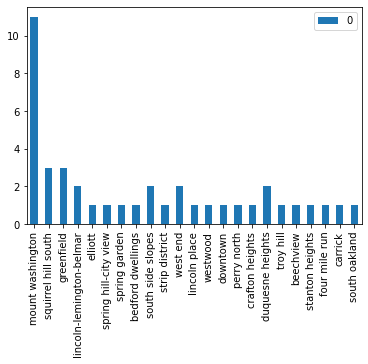

In [44]:
df = pd.DataFrame.from_dict(nbddict, orient="index")
df.plot.bar()

By looking at the resulting bar graph, we can see that Mount Washington stands out miles ahead the rest, with over triple the amount of landslide fatalities and injuries than any other neighborhood. A majority of them have a single recorded incident, while a handful have 2 or 3. Anything not in the resulting dataframe had no recoded landslides, and are thus equally safe.

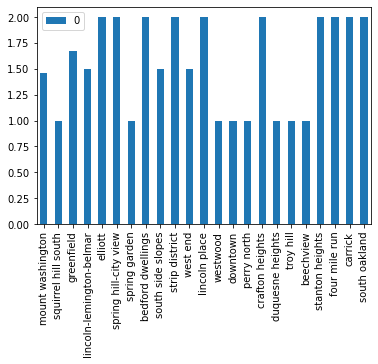

In [45]:
df2 = pd.DataFrame.from_dict(lssize, orient="index")
df2.plot.bar()

Finally, this last graph shows the average intensity of all landslides that occurred, valuing a small one at 1, medium at 2, and large at 3. By totaling the values of each landslide for a given neighborhood, and then finding the mean, we get the average strength of a landslide in any given area, though due to the small dataset for most neighborhoods, they might not be a valid representation.

**Conclusion of Dataset**

In conclusion, there are a good few neighborhoods in Pittsburgh that have no landslides on record, but some such as Greenfield, Squirrel Hill South, and especially Mount Washington have a relatively high frequency, with many other neighborhoods having high intensity ones rarely. Though, for me personally, my favorite neighborhood is Squirrel Hill North and South, so to see it be a standout dangerous neighborhood according to this metric is disappointing to say the least.

# Determining The Best Neighborhood Overall

First, lets subtract the median age from the risk_of death, because high ages are worse off, so subtracting will take more away from the total.

In [97]:
highDeaths["Total Md Age At Death"] = ds["TOTAL MD AGE AT DEATH"]
highDeaths["Total MD And Risk"] = highDeaths["risk_of_death"] 

highDeaths = highDeaths.sort_values("Total MD And Risk",ascending = False).head(10)
highDeaths

,neighborhood_municipality,infections,deaths,hospitalizations,risk_of_death,Total Md Age At Death,Total MD And Risk
144,Penn Hills,8051,107,586,8744,NaN,8744
18,Bethel Park,7059,95,269,7423,81.7,7423
162,Ross,6471,137,349,6957,NaN,6957
122,Monroeville,6181,131,455,6767,NaN,6767
125,Mount Lebanon,6321,89,195,6605,NaN,6605
123,Moon,5667,53,184,5904,NaN,5904
169,Shaler,5493,52,258,5803,NaN,5803
151,Plum,5356,70,268,5694,NaN,5694
116,McCandless,5280,130,221,5631,NaN,5631
8,Baldwin Borough,5011,73,294,5378,72.5,5378


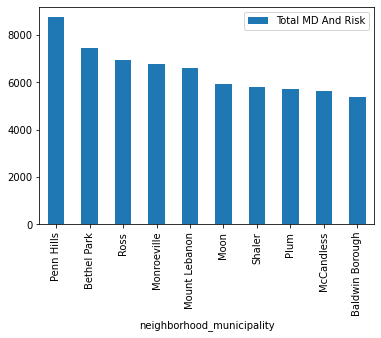

In [100]:
highDeaths.plot(x = "neighborhood_municipality",y = "Total MD And Risk", kind = "bar")

**Personal Conclusions:**

Langston: Considering the risk_of_death counter was so high compared to the median age and landslides, I'm not surprised the top neighborhood is the same as my result from the covid dataset. However, it is very interesting to me that Penn Hills is number one. I grew up in Penn Hills and I never realized it was such a nice city. When I go back home after the semester I'll have to try and appreciate how lucky I am to grow up in Penn Hills.

Narek: I was not surprised to see Bethel Park and Penn Hills were the top two. Neither had any landslide data from my perspective, and as such were equally as safe, at least according to my data. I also wasn't surprised to see that some of the locations that had landslide data still appeared on the list. The landslide data was very skewed towards a couple of prominent locations and had very little impact on most of the neighborhoods. In comparison, Mount Washington alone made up close to a quarter of the data for landslides, while at most any other data point had a third to a quarter of the number of landslides.

Tyler: I was not surprised to see Bethel Park and Penn Hills were the top two. Neither had any landslide data from my perspective, and as such were equally as safe, at least according to my data. I also wasn't surprised to see that some of the locations that had landslide data still appeared on the list. The landslide data was very skewed towards a couple of prominent locations and had very little impact on most of the neighborhoods. In comparison, Mount Washington alone made up close to a quarter of the data for landslides, while at most any other data point had a third to a quarter of the number of landslides.